   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">SOC AI Course </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Week4</h1>
<h5 style="font-family: Georgia; color: black; text-align: center; ">Designer: Mohammad Amanlou, Marzieh Mousavi</h5>

</div>

   </html>

#### Introduction:
Clustering is a technique used to group similar objects based on inherent characteristics. The goal is to partition points into clusters where points in the same cluster are more similar to each other than to those in other clusters. This technique is valuable for extracting insights from data and has applications in various fields such as customer segmentation, document categorization, and image classification.

#### Problem Definition:
- The objective is to analyze a set of images using clustering algorithms. The data, provided in the form of images and associated CSV files, must be grouped into clusters based on similarity.

- **Steps:**
  1. Preprocess the images and extract features using a pre-trained Convolutional Neural Network (CNN) like VGG16.
  2. Implement clustering algorithms (K-Means and DBSCAN) on the feature vectors to group the images into clusters.
  3. Evaluate and compare the performance of the clustering methods.

#### Feature Extraction and Processing:
- **Step 1:** Use the VGG16 model (excluding the fully connected layers) to extract features from the images.
- **Step 2:** Perform image preprocessing and prepare the data for clustering.
- **Step 3:** Discuss the importance of feature extraction and why reading raw pixels is insufficient.

#### Clustering Implementation:
- **Step 4:** Apply the K-Means and DBSCAN algorithms to the feature vectors and determine the optimal parameters (e.g., number of clusters `K` in K-Means).
- **Step 5:** Discuss the advantages and disadvantages of K-Means and DBSCAN for the given data.
- **Step 6:** Compare the clustering results and assess the effectiveness of each method.

#### Dimensionality Reduction:
- **Step 7:** Reduce the dimensionality of the feature vectors using PCA (Principal Component Analysis) to visualize the clusters in 2D/3D space.
- **Step 8:** Discuss the PCA process and how it helps in reducing the feature space.

#### Analysis and Evaluation:
- **Step 9:** Evaluate the clustering results using metrics such as silhouette score and homogeneity score.
- **Step 10:** Provide recommendations for improving the clustering models and suggest further steps for analysis.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/flower_images/flower_labels.csv')

df['image_path'] = '/content/drive/MyDrive/flower_images/' + df['file']

print(df.head())

       file  label                                     image_path
0  0001.png      0  /content/drive/MyDrive/flower_images/0001.png
1  0002.png      0  /content/drive/MyDrive/flower_images/0002.png
2  0003.png      2  /content/drive/MyDrive/flower_images/0003.png
3  0004.png      0  /content/drive/MyDrive/flower_images/0004.png
4  0005.png      0  /content/drive/MyDrive/flower_images/0005.png


In [4]:
import numpy as np
import pandas as pd
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

# Load VGG16 model without the top layers
model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model.summary()
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

features = np.array([extract_features(img) for img in df['image_path']])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/

In [5]:
  pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.430822,0.000000,5.476247,0.542736,0.000000,0.222573,0.195461,0.000000,0.000000,1.560913,...,8.277593,0.271068,2.508062,0.000000,0.009838,0.754308,0.000000,0.665055,0.134504,0.433677
1,0.000000,0.000000,5.825279,0.043406,0.000000,0.982318,0.363424,0.897467,0.000000,0.716446,...,7.045749,1.692013,0.062991,0.000000,0.000000,0.030042,0.019084,0.000000,0.440074,0.487105
2,0.000000,0.000000,7.474166,0.000000,1.092575,0.000000,0.321464,1.592200,0.000000,3.226406,...,3.222767,0.000000,0.000000,0.000000,0.820837,7.249001,0.000000,2.744368,0.495939,1.956002
3,2.092898,0.000000,9.991671,1.675276,0.292863,1.631880,0.657022,0.203146,0.000000,3.121235,...,5.419027,2.278673,3.143066,0.097754,0.042414,7.801702,0.000000,0.624501,0.787537,1.357668
4,0.593240,0.000000,9.163746,0.124684,0.720407,0.134874,3.241605,0.235250,0.211342,6.859980,...,3.816056,1.037120,3.811435,0.000000,0.223136,1.046199,0.350268,0.274467,1.042548,3.289084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.998087,0.258008,13.467101,1.169681,0.000000,2.732277,0.234700,0.533838,0.299599,0.177681,...,12.923645,0.000000,5.788613,0.299841,2.630212,0.000000,0.089526,6.763298,0.083582,0.000000
206,0.958114,0.369029,5.154335,2.552705,0.000000,0.000000,0.169075,0.702559,0.316218,1.428232,...,4.901963,1.315498,2.434534,0.099398,0.130483,1.266266,0.090563,2.120382,0.393838,3.843998
207,0.000000,0.436469,0.140684,0.000000,0.074445,2.137408,0.000000,0.000000,0.000000,0.936293,...,0.994595,0.041797,0.912251,0.000000,0.457131,2.016708,0.000000,0.451495,0.786391,8.383904
208,0.000000,0.000000,8.664833,0.199382,0.381845,0.673035,0.000000,0.838261,0.609993,0.057918,...,10.138243,0.043662,3.842359,0.000000,0.634195,0.000000,0.075564,0.195494,0.087459,1.498198


In [6]:
import pandas as pd
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df

,PC1,PC2
0,-11.221427,13.079670
1,-17.506840,17.673794
2,47.739689,6.059835
3,-1.252293,49.119320
4,-31.239290,21.122204
...,...,...
205,3.372139,51.090736
206,-20.420521,14.140448
207,93.080719,-11.151057
208,-2.602113,10.436714


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(principal_df)
features_scaled

array([[0.19614412, 0.5567257 ],
       [0.15954271, 0.59597474],
       [0.5394882 , 0.49675292],
       [0.25419667, 0.8646242 ],
       [0.07957551, 0.62543565],
       [0.17088045, 0.4184763 ],
       [0.2127338 , 0.17463568],
       [0.14551876, 0.70462257],
       [0.10189238, 0.64217424],
       [0.16080812, 0.585837  ],
       [0.19394326, 0.21797524],
       [0.11154203, 0.57850456],
       [0.17212456, 0.647215  ],
       [0.32749793, 0.41696823],
       [0.5245297 , 0.6638418 ],
       [0.12479459, 0.3260863 ],
       [0.15102857, 0.41911167],
       [0.23465091, 0.68319535],
       [0.31564412, 0.38318387],
       [0.21851659, 0.17715994],
       [0.47777113, 0.5543038 ],
       [0.6860956 , 0.2126259 ],
       [0.26280397, 0.3259241 ],
       [0.6477742 , 0.43788543],
       [0.08985308, 0.18365774],
       [0.18735605, 0.76025164],
       [0.46858776, 0.77688825],
       [0.20016322, 0.14106998],
       [0.3300195 , 0.53387725],
       [0.17201622, 0.99999994],
       [0.

from importance of Feature Extraction i can point out to dimensionality and noise reduction and efficency of model and for limitation of use raw pixel i can point out to high dimensionality which is affect on model efficiency and speed and i can point out to difficulty in learning of raw pixel and complexity of model.

#### Reading raw pixels is insufficient because:

+ Raw pixels lack contextual information.
+ CNNs capture hierarchical features (edges, shapes, patterns) that represent the image content.


In [42]:
for i in range(2,41):
  K = i
  kmeans = KMeans(n_clusters=K, random_state=0,n_init=10)
  kmeans.fit(features_scaled)

  kmeans_labels = kmeans.labels_
  X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['label'], test_size=0.2, random_state=42)

  # Evaluate K-Means
  kmeans_silhouette_score = silhouette_score(X_test, kmeans.predict(X_test))
  kmeans_homogeneity_score = homogeneity_score(y_test, kmeans.predict(X_test))
  print(f"For {i} cluster we have:")
  print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")
  print(f"K-Means Homogeneity Score: {kmeans_homogeneity_score}")

For 2 cluster we have:
K-Means Silhouette Score: 0.5183560252189636
K-Means Homogeneity Score: 0.2169739895887775
For 3 cluster we have:
K-Means Silhouette Score: 0.4114378094673157
K-Means Homogeneity Score: 0.26923354731437327
For 4 cluster we have:
K-Means Silhouette Score: 0.436962753534317
K-Means Homogeneity Score: 0.33866685270906555
For 5 cluster we have:
K-Means Silhouette Score: 0.3723697364330292
K-Means Homogeneity Score: 0.39096846327574314
For 6 cluster we have:
K-Means Silhouette Score: 0.4135080873966217
K-Means Homogeneity Score: 0.4369076624303394
For 7 cluster we have:
K-Means Silhouette Score: 0.40112391114234924
K-Means Homogeneity Score: 0.45763375174963083
For 8 cluster we have:
K-Means Silhouette Score: 0.387622594833374
K-Means Homogeneity Score: 0.45763375174963083
For 9 cluster we have:
K-Means Silhouette Score: 0.2951645851135254
K-Means Homogeneity Score: 0.5284045104349506
For 10 cluster we have:
K-Means Silhouette Score: 0.34960871934890747
K-Means Homoge

In [75]:
from sklearn.cluster import KMeans

K = 6 # best
kmeans = KMeans(n_clusters=K, random_state=0,n_init=10)
kmeans.fit(features_scaled)

kmeans_labels = kmeans.labels_

In [76]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=4)
dbscan_labels = dbscan.fit_predict(features_scaled)

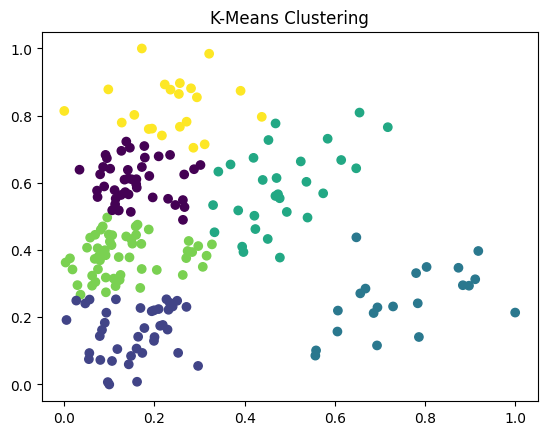

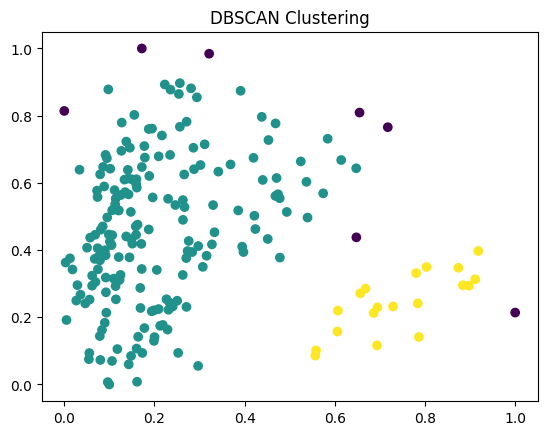

In [77]:
import matplotlib.pyplot as plt

# Visualize clusters (Example with K-Means)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.show()

# Visualize DBSCAN results
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

the choice between K-Means and DBSCAN depends on the specific characteristics of the data and the requirements of the task:

+ K-Means is suitable for large datasets with spherical clusters of similar sizes and densities, but it requires the number of clusters to be defined a priori.
+ DBSCAN is advantageous when dealing with arbitrary shapes and varying densities and is robust to outliers, but it requires careful parameter tuning and may not scale well with very large datasets.

### Advantages and Disadvantages
#### K-Means
+ Advantages: Simple, fast, works well with spherical clusters.
+ Disadvantages: Requires predefined number of clusters; sensitive to outliers.
#### DBSCAN
+ Advantages: Does not require the number of clusters; can find arbitrary shapes.
+ Disadvantages: Sensitive to parameters; struggles with varying density clusters.

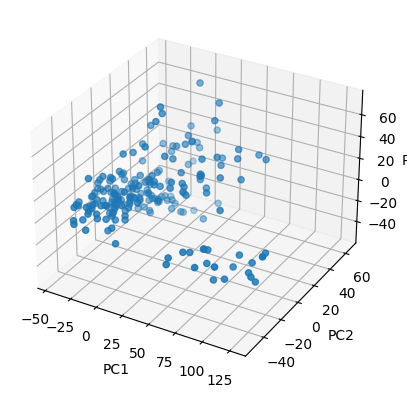

In [81]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In general, the goal of this algorithm is to map the data from the higher spaces to the lower space, so that as much information and variance as possible is preserved.
We intend to reduce the dimensions of the data to one dimension, in such a way that the information of the data is preserved as much as possible. Therefore, we should look for a vector with a specific direction, so that after mapping the data onto the vector, the greatest possible variance or dispersion is obtained.

In reducing the dimensions from n to k with the condition k≤n, the goal is to find k perpendicular vectors in such a way that by mapping the data in the direction of these vectors, the sum of squares of the mapping error is minimized.

The general process of the PCA algorithm is as follows:

+ Change the scale of the data by subtracting the data of each column from the average of that column
+ Calculation of covariance matrix
+ Calculation of eigenvectors
+ Choosing the first k vector from the first vector of eigenvectors
+ Calculation of new data with k dimensions

### Discuss PCA Process
PCA helps reduce dimensionality while retaining variance, making it easier to visualize and interpret clusters.

In [78]:
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['label'], test_size=0.2, random_state=42)

# Evaluate K-Means
kmeans_silhouette_score = silhouette_score(X_test, kmeans.predict(X_test))
kmeans_homogeneity_score = homogeneity_score(y_test, kmeans.predict(X_test))

print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")
print(f"K-Means Homogeneity Score: {kmeans_homogeneity_score}")

K-Means Silhouette Score: 0.4135080873966217
K-Means Homogeneity Score: 0.4369076624303394


In [79]:
# Evaluate DBSCAN
dbscan_silhouette_score = silhouette_score(X_test, dbscan.fit_predict(X_test))
dbscan_homogeneity_score = homogeneity_score(y_test, dbscan.fit_predict(X_test))

print(f"DBSCAN Silhouette Score: {dbscan_silhouette_score}")
print(f"DBSCAN Homogeneity Score: {dbscan_homogeneity_score}")


DBSCAN Silhouette Score: 0.35026171803474426
DBSCAN Homogeneity Score: 0.2060078008649628


### Improving Clustering Models
+ **Outlier Detection and Removal**: If outliers significantly affect clustering results, identify and remove them using appropriate methods like IQR
+ **Consider Hybrid Approaches**: Combine multiple algorithms or techniques to leverage their strengths and address limitations.
+ **Grid Search or Randomized Search**: Use these techniques to explore different combinations of hyperparameters for each algorithm.
+ **Cross-Validation**: Evaluate the performance of different hyperparameter settings using cross-validation to avoid overfitting.

### Further Steps for Analysis

+ **Internal Validation**: Assess cluster quality using metrics mentioned earlier.
+ **External Validation**: If ground truth labels are available, compare clustering results to known classes.

### Recommendations for Improvement
+ Experiment with different clustering algorithms (e.g., hierarchical clustering).
+ Tune hyperparameters for K-Means and DBSCAN.
+ Use more advanced feature extraction techniques (e.g., fine-tuning CNNs).
+ Collect more labeled data to enhance evaluation metrics.